In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# <center> Бронза

поставьте стиль matplolib как seaborn

In [2]:
plt.style.use('seaborn')

### <center> PCA

In [3]:
from sklearn.datasets import load_digits

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Импортируйте PCA с sklearn 

In [5]:
from sklearn.decomposition import PCA

Загрузите данные с помощью **load_digits** и получите ваши **X** и **y**

In [6]:
## -- Ваш код здесь
digits_data = load_digits()

In [7]:
X, y  = digits_data['data'], digits_data['target']

In [8]:
digits_data['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

Снизьте размерность данных до 2 с помощью PCA

In [9]:
## -- Ваш код здесь
pca=PCA(n_components=2, random_state=123)
X_reduced=pca.fit_transform(X)

Нарисуйте выборку со сниженной размерностью

In [10]:
X_new = pca.inverse_transform(X_reduced)

Покажите colorbar, разметьте цветами разные классы разными цветами

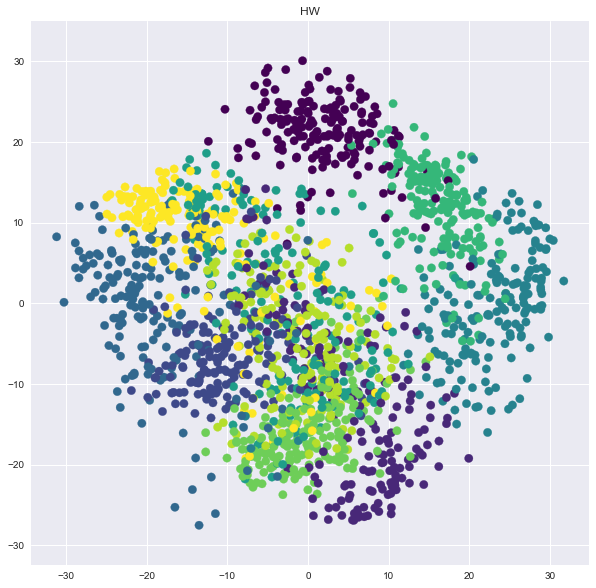

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(X_reduced[:,0], X_reduced[:,1], s=70, c=y, cmap='viridis')
#for l, v in zip(pca.explained_variance_ratio_, pca.components_):
#    d = 5 * np.sqrt(l) * v
#    plt.plot([0, d[0]], [0, d[1]], '-k', lw=3)
plt.axis('equal')
plt.title('HW');

Полученная картинка позволяет увидеть зависимости между различными цифрами. Например, цифры 0 и 6 располагаются в соседних кластерах, что говорит об их схожем написании. Наиболее "разбросанный" (по другим кластерам) – это кластер, соответствующий цифре 8, что говорит о том, что она имеет много различных написаний, делающих её схожей со многими другими цифрами.

   Покажите как выглядят первые две главные компоненты. Используйте imshow из matplotlib и выберите 'binary' cmap, также не забудьте убрать прорисовку горизонтальной и вертикальной оси

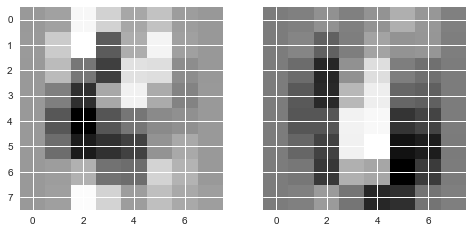

In [13]:
fig, ax = plt.subplots(1, 2, sharey=True)
## -- Ваш код здесь
#plt.axis('off')
ax[0].imshow(pca.components_[0].reshape((8,8)), cmap='binary')
ax[1].imshow(pca.components_[1].reshape((8,8)), cmap='binary')

Разделите на train и тест, размер тестовой выборки 20% и random_state 123

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
## -- Ваш код здесь
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Используйте Grid Search чтобы обучить KNN с оптимальным кол-вом соседей на данных. Не пробуйте кол-во соседей больше 50

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

In [17]:
params = {'kneighborsclassifier__n_neighbors':range(1, 30)}

In [18]:
knn = KNeighborsClassifier()

In [19]:
pipeline_grid = make_pipeline(scaler, knn)

In [20]:
## -- Ваш код здесь
grid = GridSearchCV(pipeline_grid, param_grid=params, n_jobs=-1)

In [21]:
%%time
grid.fit(X_train, y_train)

Wall time: 12 s


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'kneighborsclassifier__n_neighbors': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Какой score у лучшего KNN  на тестовой выборке?

In [22]:
grid.best_score_

0.9693806541405706

# <center> Серебро

### Постройте алгоритмы кластеризации на тех же данных

Сперва мы будем отпимизировать MiniBatchKmeans

Используйте метод локтя, чтобы выбрать оптимальное количество кластеров. Параметры алгоритма и данные используем те же, что раньше, меняем только `n_clusters`.

In [31]:
from sklearn.cluster import MiniBatchKMeans, KMeans

Нарисйуте график локтя в зависимости от n_clusters

In [73]:
%%time
vals = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters=i, random_state=i*123, init='k-means++')
    kmeans.fit(X)
    vals.append(kmeans.inertia_)

Wall time: 6.97 s


Text(0,0.5,'Distance')

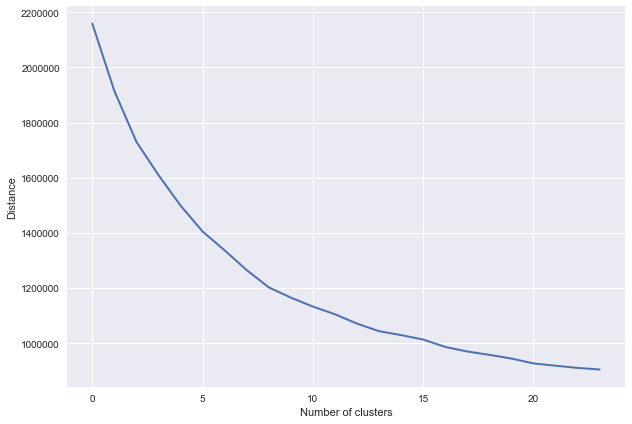

In [74]:
## -- Ваш код здесь
plt.figure(figsize=(10, 7))
plt.plot(vals,lw=2)
plt.xlabel('Number of clusters')
plt.ylabel('Distance')
#plt.xlim(0, 30)
#plt.ylim(0.9, 1.1)
#plt.yticks(np.arange(0, 1.1, 0.1));

Какое количество кластеров оптимально выбрать, согласно методу локтя?

In [ ]:
## -- Ваш код здесь
13

Попробуем еще один метод кластеризации– агломеративную кластеризацию.

In [75]:
## -- Ваш код здесь
from sklearn.cluster import AgglomerativeClustering

In [79]:
agg_clus = AgglomerativeClustering(n_clusters=10)

In [80]:
agg_clus.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=10,
            pooling_func=<function mean at 0x00000263E8C15378>)

In [88]:
kmeans = KMeans(n_clusters=13)

In [89]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=13, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [58]:
agg_clus.labels_

array([ 7,  9,  1, ...,  1, 11,  1], dtype=int64)

Посчитайте Adjusted Rand Index (`sklearn.metrics`) для получившегося разбиения на кластеры и для `KMeans` с параметрами  из прошлого вопроса

In [59]:
## -- Ваш код здесь
from sklearn.metrics import adjusted_rand_score

In [81]:
adjusted_rand_score(y, agg_clus.labels_)

0.7940031835568753

In [90]:
adjusted_rand_score(y, kmeans.labels_)

0.7279877407807842

Кто из них лучше?

In [ ]:
## -- Ваш код здесь

# <center> Золото

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
categories = [
     'comp.graphics',
     'sci.med',
     'sci.space',
     'soc.religion.christian',
     'talk.politics.guns']

Загрузите данные с помощью функции fetch_20newsgroups используйте категории categories, random_state 123, shuffle True, subset 'all'

**Закодируем тексты с помощью TF-IDF признаков.**

Закодируйте данные с помощью tf-idf с параметрами max_df = 0.5, min_df = 5, stop_words='english', max_features=1500

Почитайте что что такое stopwords

In [ ]:
## -- Ваш код здесь

Примените к данным KMeans, параметры - n_clusters - количество категорий, начальные точки инициализируется через kmeans++, максимальное кол-во итераций 150, random_state=123

In [ ]:
## -- Ваш код здесь

In [ ]:
## -- Ваш код здесь

Посчитайте silhouette_score на данных, посчитайте больше про silhouette score в документации sklearn

In [ ]:
## -- Ваш код здесь